# Lenguaje de Señas con Yolov5

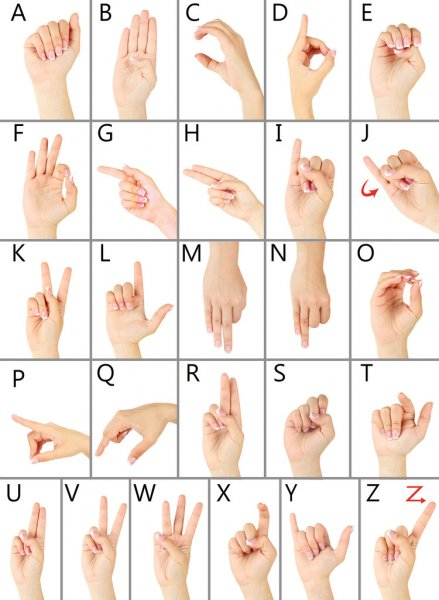

El lenguaje de señas .... [ahi algunos puntos mas]

**Recomendación abrir su drive, crear la carpeta Trabajo Final y por ultimo ejecutar las celdas comentadas**

Abrir conexion a mi drive

In [ ]:
from google.colab import drive

drive.mount("/drive")
%cd /drive/MyDrive/Trabajo Final

Mounted at /drive
/drive/MyDrive/Trabajo Final


Se clona el yolov5

In [ ]:
# !git clone https://github.com/ultralytics/yolov5
# !pip install -qr yolov5/requirements.txt
# %cd yolov5

# import torch
# from IPython.display import Image, clear_output
# from utils.google_utils import gdrive_download

# clear_output()

Se extrae las imágenes del repositorio de roboflow

In [ ]:
# !curl -L "https://public.roboflow.com/ds/xkBJOkNR3A?key=rNvTpdmoPn" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Lectura de las clases de letras del abecedario

In [ ]:
# Extraer informacion del archivo 
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 26
names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [ ]:
# Definir el número de clases basadas en data.yaml
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
# Se visualiza lo que contiene el archivo models yolov5s
%cat yolov5/models/yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

## Personalizar el modelo con los valores que deseemos

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate yolov5/models/custom_yolov5s.yaml

# parameters
#paramettros
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
#anclas
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
# Yolov5 columna vertebral
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
# YOLOV% cabeza
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

## Entrenamiento de 500 epocas

In [19]:
%%time
%cd yolov5/
!python train.py --img 416 --batch 16 --epochs 500 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

/drive/MyDrive/Trabajo Final/yolov5
github: ⚠️ WARNING: code is out of date by 26 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 2021-6-16 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/custom_yolov5s.yaml', data='../data.yaml', device='', entity=None, epochs=500, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov5s_results', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5s_results6', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs

**Analizamos** las imagenes de prueba

In [ ]:
%cd /drive/MyDrive/Trabajo Final
!python yolov5/detect.py --weights yolov5/runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source test/images

/drive/MyDrive/Trabajo Final
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=416, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='test/images', update=False, view_img=False, weights=['yolov5/runs/train/yolov5s_results/weights/best.pt'])
requirements: /drive/MyDrive/Trabajo Final/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-16 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 232 layers, 7313943 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.

Mostramos las imágenes de prueba ya procesadas

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n")
    

Output hidden; open in https://colab.research.google.com to view.

## Para detección de video

video inicial sin procesar

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# se pega la ruta del video a comprimir
save_path = "video1.mp4"

# se menciona la ruta donde se guardara el video 
compressed_path = "result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video1/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

procesamos el video

In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/yolov5s_results/weights/best.pt --source result_compressed.mp4 --conf 0.4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='result_compressed.mp4', update=False, view_img=False, weights=['yolov5/runs/train/yolov5s_results/weights/best.pt'])
requirements: /drive/My Drive/Trabajo Final/requirements.txt not found, check failed.
YOLOv5 🚀 2021-6-16 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 232 layers, 7313943 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.m

video final ya procesado


In [18]:
from IPython.display import HTML
from base64 import b64encode
import os

# se pega la ruta del video a comprimir
save_path = "runs/detect/exp3/result_compressed.mp4"

# se menciona la ruta donde se guardara el video 
compressed_path = "result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:result_compressed/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=700 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.